In [1]:
import pandas as pd
import numpy as np
from math import isnan
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from itertools import chain
from src.swap_utils import get_pool_value_by_coin

from src.data_extractors import get_pools, get_prices, get_price_enriched

#### Get Bostrom and Osmosis Pools Data

In [2]:
pools_df = get_pools(display_data=False, bostrom_related_osmo_pools=None)
pools_df = \
    pools_df[
        (pools_df.network.isin(['bostrom', 'space-pussy'])) |
        (pools_df.reserve_coin_denoms.map(lambda denoms: 'boot in osmosis' in denoms))]
pools_df

,network,id,type_id,balances,reserve_coin_denoms,swap_fee
0,bostrom,1,1,"[{'denom': 'boot', 'amount': '3851780527972'},...","[boot, hydrogen]",0.0030
1,bostrom,2,1,"[{'denom': 'boot', 'amount': '11851646654'}, {...","[boot, milliampere]",0.0030
2,bostrom,3,1,"[{'denom': 'boot', 'amount': '23317694652'}, {...","[boot, tocyb]",0.0030
3,bostrom,4,1,"[{'denom': 'hydrogen', 'amount': '677659571487...","[hydrogen, tocyb]",0.0030
4,bostrom,5,1,"[{'denom': 'hydrogen', 'amount': '229670667768...","[hydrogen, milliampere]",0.0030
5,bostrom,6,1,"[{'denom': 'hydrogen', 'amount': '199069928195...","[hydrogen, millivolt]",0.0030
6,bostrom,7,1,"[{'denom': 'hydrogen', 'amount': '496742718184...","[hydrogen, uosmo in bostrom]",0.0030
7,bostrom,8,1,[],"[hydrogen, deprecated uatom in bostrom]",0.0030
8,bostrom,9,1,[],"[uosmo in bostrom, deprecated uatom in bostrom]",0.0030
9,bostrom,10,1,"[{'denom': 'milliampere', 'amount': '355396028...","[milliampere, millivolt]",0.0030


#### Calculate Prices

In [3]:
price_df = get_prices(pools_df=pools_df, display_data=True, zero_fee=True)

,uosmo in bostrom,weth.grv in bostrom,uatom in bostrom,pussy,weth.grv in osmosis,dot in osmosis,aevmos in bostrom,ujuno in bostrom,tocyb,udsm in bostrom,hydrogen,boot in osmosis,uatom in osmosis,uion,liquidpussy,ujuno in osmosis,milliampere,boot,millivolt,ibc/6AE98883D4D5D5FF9E50D7130F1305DA2FFA0C652D1DD9C123657C6B4EB2DF8A,uosmo,millivolt(pussy),ibc/E97634A40119F1898989C2A23224ED83FDD0A57EA46B3A094E287288D1672B44,weth in osmosis,liquidpussy in bostrom,milliampere(pussy),deprecated uatom in bostrom,ugraviton in bostrom,pussy in bostrom,uatom,ujuno
uosmo in bostrom,1,NaN,14.66501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weth.grv in bostrom,NaN,1,6085546464.535113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3004622.51608,NaN,NaN,NaN,NaN,NaN,NaN,13208788.669392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uatom in bostrom,0.06819,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000486,NaN,NaN,NaN,NaN,NaN,NaN,0.002255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN
pussy,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2755.577783,NaN,NaN,1,NaN,NaN
weth.grv in osmosis,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,14018504.425018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dot in osmosis,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,44.118528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aevmos in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,22952140932.242931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ujuno in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.007714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
tocyb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.236187,NaN,NaN,NaN,NaN,NaN,NaN,1.100347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udsm in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.141526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Prices without References to the Networks

In [4]:
price_enriched_df = get_price_enriched(price_df=price_df, display_data=True)

,uosmo in bostrom,weth.grv in bostrom,uatom in bostrom,pussy,weth.grv in osmosis,dot in osmosis,aevmos in bostrom,ujuno in bostrom,tocyb,udsm in bostrom,hydrogen,boot in osmosis,uatom in osmosis,uion,liquidpussy,ujuno in osmosis,milliampere,boot,millivolt,ibc/6AE98883D4D5D5FF9E50D7130F1305DA2FFA0C652D1DD9C123657C6B4EB2DF8A,uosmo,millivolt(pussy),ibc/E97634A40119F1898989C2A23224ED83FDD0A57EA46B3A094E287288D1672B44,weth in osmosis,liquidpussy in bostrom,milliampere(pussy),deprecated uatom in bostrom,ugraviton in bostrom,pussy in bostrom,uatom,ujuno
uosmo in bostrom,1,NaN,14.66501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007223,0.033604,14.66501,NaN,NaN,NaN,NaN,0.033604,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.66501,NaN
weth.grv in bostrom,NaN,1,6085546464.535113,NaN,1,NaN,NaN,NaN,NaN,NaN,3004622.51608,13208788.669392,6085546464.535113,NaN,NaN,NaN,NaN,13208788.669392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085546464.535113,NaN
uatom in bostrom,0.06819,0.0,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000486,0.002255,1,NaN,NaN,NaN,NaN,0.002255,NaN,NaN,0.06819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN
pussy,NaN,NaN,7343068.244851,1,NaN,NaN,NaN,NaN,NaN,NaN,3593.228762,16486.355373,7343068.244851,NaN,0.305747,NaN,NaN,16486.355373,NaN,NaN,NaN,NaN,NaN,NaN,0.305747,2755.577783,NaN,NaN,1,7343068.244851,NaN
weth.grv in osmosis,NaN,1,6085546464.535113,NaN,1,NaN,NaN,NaN,NaN,NaN,3004622.51608,14018504.425018,6085546464.535113,NaN,NaN,NaN,NaN,14018504.425018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085546464.535113,NaN
dot in osmosis,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9.495317,44.118528,NaN,NaN,NaN,NaN,NaN,44.118528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aevmos in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,22952140932.242931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ujuno in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.007714,0.038369,NaN,NaN,NaN,1,NaN,0.038369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
tocyb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.236187,1.100347,NaN,NaN,NaN,NaN,NaN,1.100347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
udsm in bostrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.141526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get Pools Liquidity

network,id,reserve_coin_denoms,"liquidity, GH"
space-pussy,1,"[liquidpussy, pussy]",481.5
space-pussy,3,"[liquidpussy, millivolt(pussy)]",109.4
space-pussy,2,"[liquidpussy, milliampere(pussy)]",88.6
space-pussy,4,"[milliampere(pussy), millivolt(pussy)]",10.2
space-pussy,5,"[milliampere(pussy), pussy]",8.4
osmosis,596,"[uatom in osmosis, boot in osmosis]","2,392.2"
osmosis,912,"[weth in osmosis, boot in osmosis]","1,742.3"
osmosis,597,"[boot in osmosis, uosmo]",851.4
osmosis,911,"[weth.grv in osmosis, boot in osmosis]",649.8
osmosis,919,"[dot in osmosis, boot in osmosis]",1.9


Total liquidity: 134,046 GH


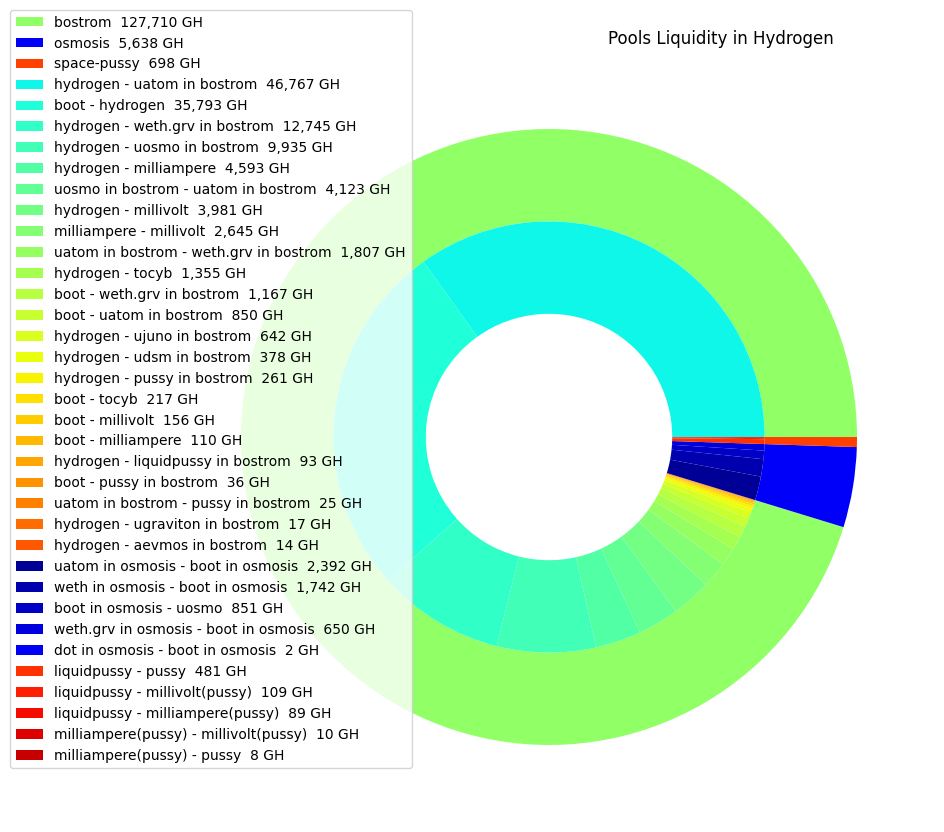

In [5]:
def get_pool_liquidity(balances: list, target_denom: str = 'hydrogen', main_liquidity_denom: str = 'hydrogen',
                       price_enriched_df: pd.DataFrame = price_enriched_df) -> float:
    if not balances:
        return 0
    denoms = [item['denom'] for item in balances]
    balances_dict = {item['denom']: int(item['amount']) for item in balances}
    if target_denom in denoms:
        return balances_dict[target_denom] * 2
    elif not isnan(price_enriched_df.loc[target_denom, denoms[0]]):
        return balances_dict[denoms[0]] * price_enriched_df.loc[target_denom, denoms[0]] * 2
    elif not isnan(price_enriched_df.loc[target_denom, denoms[1]]):
        return balances_dict[denoms[1]] * price_enriched_df.loc[target_denom, denoms[1]] * 2
    elif not isnan(price_enriched_df.loc[target_denom, main_liquidity_denom]) and not isnan(
            price_df.loc[main_liquidity_denom, denoms[0]]):
        return balances_dict[denoms[0]] * price_enriched_df.loc[target_denom, main_liquidity_denom] * \
               price_enriched_df.loc[main_liquidity_denom, denoms[0]] * 2
    elif not isnan(price_enriched_df.loc[target_denom, main_liquidity_denom]) and not isnan(price_df.loc[main_liquidity_denom, denoms[1]]):
        return balances_dict[denoms[1]] * price_enriched_df.loc[target_denom, main_liquidity_denom] * \
               price_enriched_df.loc[main_liquidity_denom, denoms[1]] * 2
    return 0


pools_df['liquidity, GH'] = pools_df['balances'].map(get_pool_liquidity) / 1e9
display(HTML(
    pools_df[['network', 'id', 'reserve_coin_denoms', 'liquidity, GH']]
    .sort_values(['network', 'liquidity, GH'], ascending=False)
    .to_html(index=False, notebook=True, show_dimensions=False, float_format='{0:7,.1f}'.format)
    .replace('text-align: left;', 'text-align: right')
    .replace('<tr>', '<tr align="right">')))

print(
    f"Total liquidity: {round(sum(pools_df['liquidity, GH'])):>,} GH")

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap("jet", 20)
cm2 = plt.get_cmap("jet", 50)
cout = cm(np.array([10, 2, 16]))


pools_df['denoms'] = pools_df.reserve_coin_denoms.map(lambda x: f'{x[0]} - {x[1]}')
outer = pools_df.groupby('network')['liquidity, GH'].sum().sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner = pools_df[pools_df['liquidity, GH'] > 1].groupby(
    ['network', 'denoms'])['liquidity, GH'].sum().sort_values(ascending=False).sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[1], j) for i, j in zip(inner.index, inner)]
outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
cin = cm2(np.array(list(range(18, 41)) + list(range(1, 6)) + list(range(42, 49))))
ax.pie(inner.values.flatten(),
       radius=1-size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)

ax.set_title('Pools Liquidity in Hydrogen'+' '*19, loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.2, 0.07))
handles, labels = ax.get_legend_handles_labels()
plt.show()

pools_df.to_csv('data/pools_liquidity.csv')

### Liquidity by Coins

Liquidity by Coins


coin,network,"liquidity, GH"
hydrogen,bostrom,58287.546294
uatom in bostrom,bostrom,26785.377403
boot,bostrom,19164.384491
weth.grv in bostrom,bostrom,7859.315927
uosmo in bostrom,bostrom,7028.713639
milliampere,bostrom,3674.330059
millivolt,bostrom,3391.242734
boot in osmosis,osmosis,2819.057297
uatom in osmosis,osmosis,1196.174205
weth in osmosis,osmosis,871.154328


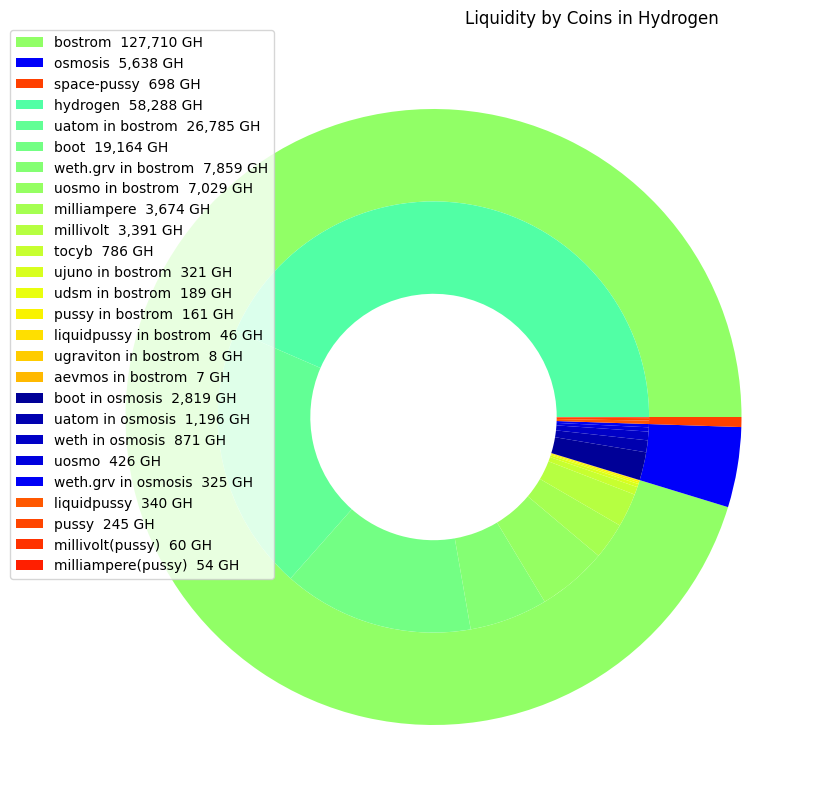

In [6]:
coin_list = set(chain(*pools_df.reserve_coin_denoms.to_list()))
coin_liquidity_data = []
coin_liquidity_df = pd.DataFrame(columns=['coin', 'network', 'liquidity, GH'])
for coin_denom in coin_list:
    pools_liquidity_agg_by_network_df = \
        pools_df[pools_df.reserve_coin_denoms.map(lambda x: coin_denom in x)].groupby('network')['liquidity, GH'].sum() * 0.5
    for network, coin_liquidity in pools_liquidity_agg_by_network_df.items():
        coin_liquidity_data.append({
            'coin': coin_denom,
            'network': network,
            'liquidity, GH': coin_liquidity})
coin_liquidity_df = pd.DataFrame(coin_liquidity_data).sort_values('liquidity, GH', ascending=False).reset_index().drop(columns=['index'])

print('Liquidity by Coins')
display(HTML(
    coin_liquidity_df.to_html(
                index=False, notebook=True, show_dimensions=False)))

fig, ax = plt.subplots(figsize=(10, 10))
size = 0.3
cm = plt.get_cmap("jet", 20)
cout = cm(np.array([10, 2, 16]))

outer = coin_liquidity_df.groupby('network')['liquidity, GH'].sum().sort_index(
        axis=0, level=[0], ascending=[True], inplace=False)
inner = coin_liquidity_df[coin_liquidity_df['liquidity, GH'] > 1].groupby(
    ['network', 'coin'])['liquidity, GH'].sum().sort_values(ascending=False).sort_index(axis=0, level=[0],
                                                                                             ascending=[True],
                                                                                             inplace=False)
inner_labels = ['{1}  {2:>,.0f} GH'.format(i[0], i[1], j) for i, j in zip(inner.index, inner)]
outer_labels = ['{0}  {1:>,.0f} GH'.format(i, j) for i, j in zip(outer.index, outer)]
ax.pie(outer.values.flatten(), radius=1,
       labeldistance=0.73,
       wedgeprops=dict(width=size), colors=cout)
cm2 = plt.get_cmap("jet", 50)
cin = cm2(np.array(list(range(22, 36)) + list(range(1, 6)) + list(range(40, 45))))
ax.pie(inner.values.flatten(), radius=1 - size,
       wedgeprops=dict(width=size),
       labeldistance=0.5, colors=cin)

ax.set_title('Liquidity by Coins in Hydrogen                   ', loc='right')

plt.legend(outer_labels + inner_labels, loc=(-0.05, 0.29))
handles, labels = ax.get_legend_handles_labels()
plt.show()

coin_liquidity_df.to_csv('data/coins_liquidity.csv')